In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Tasks

Feature selection:
* Check visually the distribution of the data points on each individual axis (with colors corresponding to the species).
* Which axis seems the most suitable for clustering on one dimension, and why?
* Compute k-Means with k=3 on two dimensions (i.e. with two predictors) and visualize the result.

Feature extraction:
* Compute a PCA on the 4 predictor dimensions in order to extract one unique dimension.
* Display the percentage of variance explained by each of the components.
* Check visually the distribution of the data points on each component axis (with colors corresponding to the species).
* Plot the data points in the 2D plane made by the two principal components.
* Add the projection of the four original vectors (i.e. the four initial features) to that plane.
* Compute a k-Means with k=3 on the two principal components and visualize the result.

In [3]:
dataset = pd.read_csv('data/iris.csv')

#### Preparing data

In [22]:
dataset.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [25]:
X = dataset.drop('species', axis=1)
y = dataset['species']

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# back ve DataFrame
X = pd.DataFrame(data=X, columns=dataset.columns[:-1])
X

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]

Check visually the distribution of the data points on each individual axis (with colors corresponding to the species).

In [30]:
def plot_classes(X, y, feature_x, feature_y):
    fig = plt.figure(figsize=(10,6))

    for i, species in enumerate(y.unique()):
        plt.scatter(X[y==species][feature_x], X[y==species][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = species)

    plt.title(f'{feature_x} and {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.axis('scaled')

    plt.show()

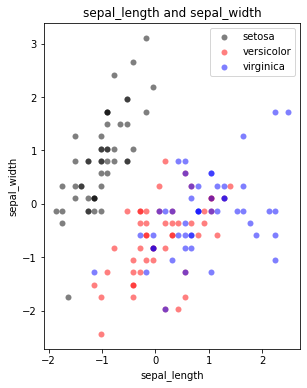

In [31]:
plot_classes(X, y, 'sepal_length', 'sepal_width')

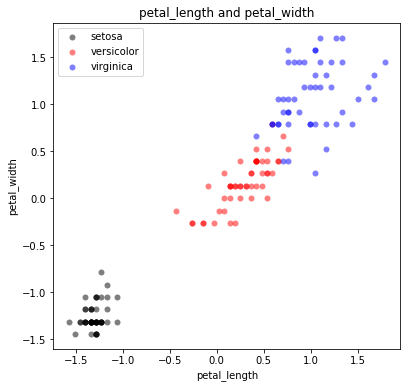

In [32]:
plot_classes(X, y, 'petal_length', 'petal_width')

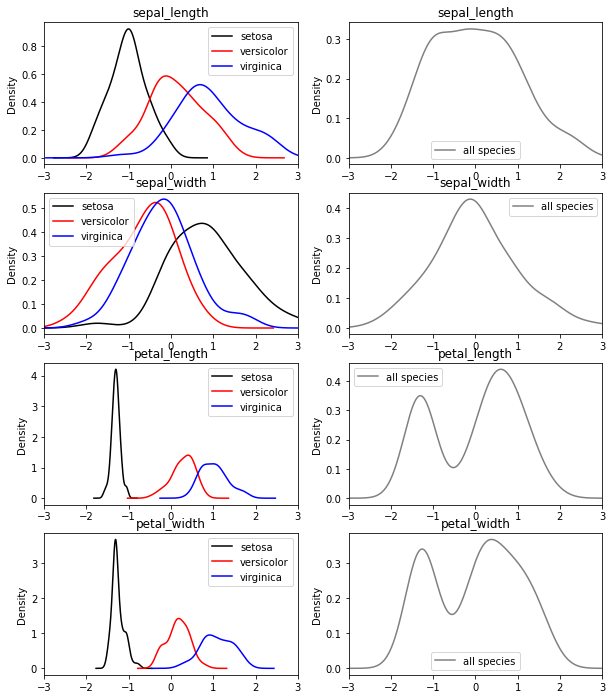

In [33]:
fig, axs = plt.subplots(4,2, figsize=(5*2,4*3))

# Loop on the predictors (on subplot for each feature)
for i_feature, feature in enumerate(X.columns):
    
    # Figures knowing the target labels
    for i_specy, specy in enumerate(y.unique()):
        X[y==specy][feature].plot(kind='density', color=['black', 'red', 'blue'][i_specy], label=specy, ax=axs[i_feature,0])
    axs[i_feature,0].set_title(feature)
    axs[i_feature,0].set_xlim([-3,3])
    axs[i_feature,0].legend()

    # Figures not knowing the target labels
    X[feature].plot(kind='density', color='grey', label='all species', ax=axs[i_feature,1])
    axs[i_feature,1].set_title(feature)
    axs[i_feature,1].set_xlim([-3,3])
    axs[i_feature,1].legend()
    
plt.show()

When we check the global data distribution on each dimension, i.e. without consideration of the different species (what we "really see" when we process a clustering), we notice that there is more separation on petal_length and petal_width axis. Note that since each axis has been standardized (feature scaling), we cannot consider the data spreading on each individual axis to make a selection.

# k-Means on one feature

Let's imagine that we have to keep one feature only and that we pick sepal width.

In [49]:
X_1d = dataset['petal_width'].values.reshape(-1, 1) #reshape when have only one feature

In [50]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X_1d)

E:\Application\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [51]:
y_pred = kmeans.predict(X_1d)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


##### Ploting after predicting (group data based on y_predict)

In [52]:
def plot_clusters(X, y_pred, feature_x, feature_y):
    fig = plt.figure(figsize=(6,6))

    color_list = plt.cm.get_cmap('rainbow', k)

    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        plt.scatter(X[y_pred == i][feature_x], X[y_pred == i][feature_y], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

    plt.title(f'{feature_x} and {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()

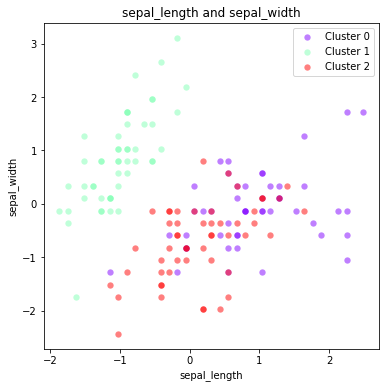

In [47]:
plot_clusters(X, y_pred, 'sepal_length', 'sepal_width')

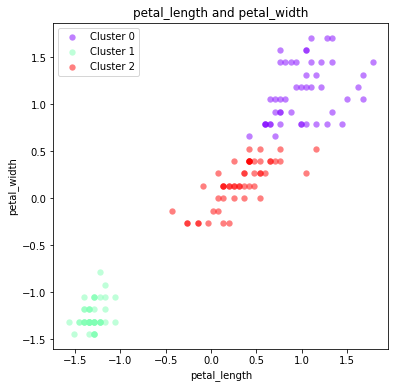

In [48]:
plot_clusters(X, y_pred, 'petal_length', 'petal_width')

### PCA
Compute a PCA on the 4 predictor dimensions in order to extract one unique dimension.
* Display the percentage of variance explained by each of the components.
* Check visually the distribution of the data points on each component axis (with colors corresponding to the species).
* Plot the data points in the 2D plane made by the two principal components.
* Add the projection of the four original vectors (i.e. the four initial features) to that plane.
* Compute a k-Means with k=3 on the two principal components and visualize the result.

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [54]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

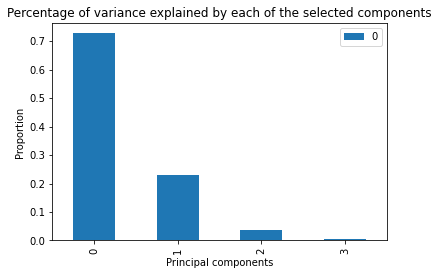

In [55]:
pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('Principal components')
plt.ylabel('Proportion')
plt.title('Percentage of variance explained by each of the selected components')
plt.show()

In [58]:
X_pca = pca.transform(X)

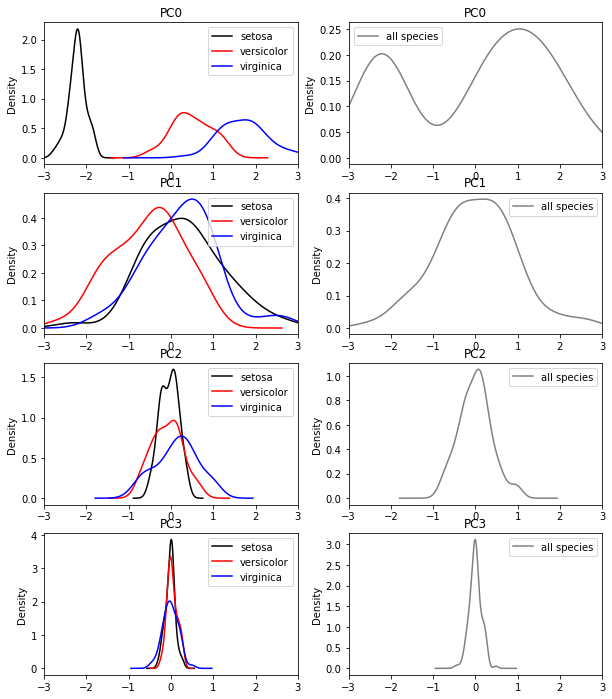

In [59]:
fig, axs = plt.subplots(4,2, figsize=(5*2,4*3))

# Loop on the predictors (on subplot for each feature)
for i_feature in range(pca.n_components_):
    
    # Figures knowing the target labels
    for i_specy, specy in enumerate(y.unique()):
        pd.DataFrame(data=X_pca[y==specy,i_feature], columns=[specy]).plot(kind='density', color=['black', 'red', 'blue'][i_specy], ax=axs[i_feature,0])
    axs[i_feature,0].set_title('PC'+str(i_feature))
    axs[i_feature,0].set_xlim([-3,3])
    axs[i_feature,0].legend()

    # Figures not knowing the target labels
    pd.DataFrame(data=X_pca[:,i_feature], columns=['all species']).plot(kind='density', color='grey', ax=axs[i_feature,1])
    axs[i_feature,1].set_title('PC'+str(i_feature))
    axs[i_feature,1].set_xlim([-3,3])
    axs[i_feature,1].legend()
    
plt.show()

In [60]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [61]:
print(X.columns.values)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


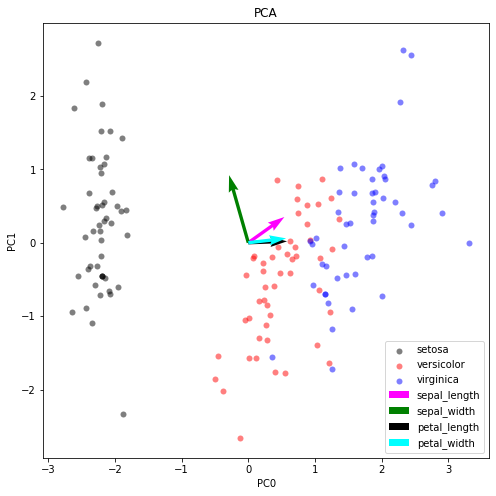

In [62]:
fig = plt.figure(figsize=(8,8))

for i, specy in enumerate(y.unique()):
    plt.scatter(X_pca[dataset['species']==specy,0], X_pca[dataset['species']==specy,1], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

for i_feature, feature in enumerate(X.columns):
    plt.quiver(pca.components_[0,i_feature], pca.components_[1,i_feature], scale=1, scale_units='xy', label = feature, color = ['magenta', 'green', 'black', 'cyan'][i_feature])

plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()